In [ ]:

import psycopg2 as ps
import pandas as pd
def connect_to_db(host_name, dbname, port, username, password):
    try:
        conn = ps.connect(host=host_name, database=dbname, user=username, password=password, port=port)

    except ps.OperationalError as e:
        raise e
    else:
        print('Connected!')
        return conn
#Main



#database credentials

host_name = 'XXXXXXXXXX'

dbname = 'XXXXXXXXXX'

port = 'XXXXXXXXXX'

username = 'XXXXXXXXXX'

password = 'XXXXXXXXXX'

conn = None



#establish a connection to db

conn = connect_to_db(host_name, dbname, port, username, password)

curr = conn.cursor()

Connected!


In [ ]:


def fetch_data_to_df(conn, query):

    # Execute the query

    with conn.cursor() as cur:

        cur.execute(query)

        # Fetch all rows from the result set

        rows = cur.fetchall()



    # Get column names from cursor description

    col_names = [desc[0] for desc in cur.description]



    # Create DataFrame

    df = pd.DataFrame(rows, columns=col_names)



    return df



# Query to fetch data

query = "SELECT * FROM VIDEOS"

# Fetch data into a DataFrame

df_from_db = fetch_data_to_df(conn, query)



# Close the connection

conn.close()



# Display the DataFrame

print(df_from_db)

        video_id                         video_title upload_date  \
0    p_PH5kD6CyM  SHALLIPOPI X COSTA TITCH TYPE BEAT  2023-12-15   
1    s9v_hMQSR8Y        DOUBLE (AFROBEATS TYPE BEAT)  2022-12-16   
2    a0MlTHduXkU          FOLD (AFROBEATS TYPE BEAT)  2021-12-10   
3    hnZNffTECms              ASA X PPRIME TYPE BEAT  2022-06-21   
4    o6TgwAE2CwU          KHAID X OMAH LAY TYPE BEAT  2023-12-09   
..           ...                                 ...         ...   
200  x5O5x5sRoGQ               FAVE X TENI TYPE BEAT  2022-02-11   
201  MpbweU3RN9M          (SMOOTH) FIREBOY TYPE BEAT  2021-04-17   
202  Xb5QSouAtQU         TRENT (AFROBEATS TYPE BEAT)  2021-11-12   
203  -g_9TzgD6VI                    JOEBOY TYPE BEAT  2020-10-23   
204  CHO1aBSK2UI                YOUNG JONN TYPE BEAT  2022-12-02   

     video_duration publishing_time  view_count  like_count  comment_count  
0                76        05:48:04        4745          37              0  
1                87        09

In [ ]:
df_from_db.head(10)

,video_id,video_title,upload_date,video_duration,publishing_time,view_count,like_count,comment_count
0,p_PH5kD6CyM,SHALLIPOPI X COSTA TITCH TYPE BEAT,2023-12-15,76,05:48:04,4745,37,0
1,s9v_hMQSR8Y,DOUBLE (AFROBEATS TYPE BEAT),2022-12-16,87,09:08:05,174,5,2
2,a0MlTHduXkU,FOLD (AFROBEATS TYPE BEAT),2021-12-10,76,05:22:05,279,4,0
3,hnZNffTECms,ASA X PPRIME TYPE BEAT,2022-06-21,82,11:24:48,184,4,0
4,o6TgwAE2CwU,KHAID X OMAH LAY TYPE BEAT,2023-12-09,127,08:37:10,6626,68,3
5,e1pPfuu-GF8,REMA X SELENA GOMEZ TYPE BEAT,2023-10-06,88,04:20:22,152,5,3
6,7EH2ZfeUYpE,T.I BLAZE TYPE BEAT,2022-11-25,129,05:02:18,9896,101,6
7,yLaeUvT2Nxs,NAIRA MARLEY X MOHBAD TYPE BEAT,2021-06-18,114,12:07:38,11867,143,10
8,_deCvU0tCIA,KHAID X REMA TYPE BEAT,2022-05-07,97,11:32:02,12220,121,5
9,l2zCKhyslmg,WEIRD (AFROBEATS TYPE BEAT),2022-10-13,66,20:48:42,76,4,0


In [ ]:

#sorting out YouTube shorts videos by video_duration
df_from_db.sort_values(by="video_duration", ascending=False).tail(34)

,video_id,video_title,upload_date,video_duration,publishing_time,view_count,like_count,comment_count
52,WRmeoWP2Ykk,SHAYO DAVIDS TYPE BEAT,2021-03-05,52,23:04:36,71,3,0
179,Dkp4hXt951E,YOUNG JONN TYPE BEAT,2023-01-20,50,11:02:59,33,1,0
153,oqwBuQ1-kY0,NAIRA MARLEY X MOHBAD TYPE BEAT,2023-01-20,39,11:06:49,607,25,0
120,7R6BbVEA-Cs,SEYI VIBEZ X ASAKE TYPE BEAT #afrobeat #asake,2023-07-08,39,20:00:59,135,14,0
49,CTXO3X3k-rg,TI BLAZE TYPE BEAT,2023-01-20,36,09:27:03,150,10,0
167,LQkKSNKHy4I,ASAKE X SEYI VIBEZ TYPE BEAT,2023-01-27,35,08:16:24,316,14,0
42,po84mFRT8bs,BURNA BOY X BYRON MESSIA TYPE BEAT #afrobeat #...,2023-11-29,32,16:58:35,85,1,0
33,9M_sQOjTerA,REMA X BOY SPYCE TYPE BEAT,2023-02-13,31,10:21:38,143,2,0
21,saizlPt_KOo,REMA X SELENA GOMEZ TYPE BEAT #afrobeat #rema ...,2023-10-06,31,04:23:49,176,9,1
67,6o5rIl8D-Oo,BNXN X SHAYO DAVIDS TYPE BEAT,2023-02-24,31,08:47:00,92,2,0


In [ ]:

#droping youtube shorts videos to avoid skewing the data

sorted_data = df_from_db.sort_values(by="video_duration", ascending=False)

# Get the indices of the last 34 rows (sorted by 'video_duration')
indices_to_delete = sorted_data.tail(34).index

# Delete the rows with the identified indices
df_from_db = df_from_db.drop(indices_to_delete)

# Verify that the rows have been deleted
print(df_from_db)

        video_id                         video_title upload_date  \
0    p_PH5kD6CyM  SHALLIPOPI X COSTA TITCH TYPE BEAT  2023-12-15   
1    s9v_hMQSR8Y        DOUBLE (AFROBEATS TYPE BEAT)  2022-12-16   
2    a0MlTHduXkU          FOLD (AFROBEATS TYPE BEAT)  2021-12-10   
3    hnZNffTECms              ASA X PPRIME TYPE BEAT  2022-06-21   
4    o6TgwAE2CwU          KHAID X OMAH LAY TYPE BEAT  2023-12-09   
..           ...                                 ...         ...   
200  x5O5x5sRoGQ               FAVE X TENI TYPE BEAT  2022-02-11   
201  MpbweU3RN9M          (SMOOTH) FIREBOY TYPE BEAT  2021-04-17   
202  Xb5QSouAtQU         TRENT (AFROBEATS TYPE BEAT)  2021-11-12   
203  -g_9TzgD6VI                    JOEBOY TYPE BEAT  2020-10-23   
204  CHO1aBSK2UI                YOUNG JONN TYPE BEAT  2022-12-02   

     video_duration publishing_time  view_count  like_count  comment_count  
0                76        05:48:04        4745          37              0  
1                87        09

In [ ]:

# Reset the index of the DataFrame
df_from_db = df_from_db.reset_index(drop=True)

# Verify the DataFrame with reset index
print(df_from_db)

        video_id                         video_title upload_date  \
0    p_PH5kD6CyM  SHALLIPOPI X COSTA TITCH TYPE BEAT  2023-12-15   
1    s9v_hMQSR8Y        DOUBLE (AFROBEATS TYPE BEAT)  2022-12-16   
2    a0MlTHduXkU          FOLD (AFROBEATS TYPE BEAT)  2021-12-10   
3    hnZNffTECms              ASA X PPRIME TYPE BEAT  2022-06-21   
4    o6TgwAE2CwU          KHAID X OMAH LAY TYPE BEAT  2023-12-09   
..           ...                                 ...         ...   
166  x5O5x5sRoGQ               FAVE X TENI TYPE BEAT  2022-02-11   
167  MpbweU3RN9M          (SMOOTH) FIREBOY TYPE BEAT  2021-04-17   
168  Xb5QSouAtQU         TRENT (AFROBEATS TYPE BEAT)  2021-11-12   
169  -g_9TzgD6VI                    JOEBOY TYPE BEAT  2020-10-23   
170  CHO1aBSK2UI                YOUNG JONN TYPE BEAT  2022-12-02   

     video_duration publishing_time  view_count  like_count  comment_count  
0                76        05:48:04        4745          37              0  
1                87        09

In [ ]:
df_from_db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   video_id         171 non-null    object
 1   video_title      171 non-null    object
 2   upload_date      171 non-null    object
 3   video_duration   171 non-null    int64 
 4   publishing_time  171 non-null    object
 5   view_count       171 non-null    int64 
 6   like_count       171 non-null    int64 
 7   comment_count    171 non-null    int64 
dtypes: int64(4), object(4)
memory usage: 10.8+ KB


In [ ]:
df_from_db.describe()

,video_duration,view_count,like_count,comment_count
count,171.000000,171.000000,171.000000,171.000000
mean,120.777778,601.192982,8.391813,1.029240
std,47.329108,1697.418103,18.047771,1.480965
min,64.000000,17.000000,0.000000,0.000000
25%,86.000000,94.000000,2.000000,0.000000
50%,108.000000,154.000000,4.000000,0.000000
75%,152.000000,326.500000,6.500000,2.000000
max,381.000000,12220.000000,143.000000,10.000000


#the target variable is the view_count.
the mean looks good but the std is
worrying because the view count is
spread wide away from the mean.

In [ ]:

# Renaming the column "video_duration" to "video_duration_seconds" to avoid confusion
df_from_db = df_from_db.rename(columns={"video_duration": "video_duration_seconds"})

# Verify the DataFrame with the renamed column
print(df_from_db)

        video_id                         video_title upload_date  \
0    p_PH5kD6CyM  SHALLIPOPI X COSTA TITCH TYPE BEAT  2023-12-15   
1    s9v_hMQSR8Y        DOUBLE (AFROBEATS TYPE BEAT)  2022-12-16   
2    a0MlTHduXkU          FOLD (AFROBEATS TYPE BEAT)  2021-12-10   
3    hnZNffTECms              ASA X PPRIME TYPE BEAT  2022-06-21   
4    o6TgwAE2CwU          KHAID X OMAH LAY TYPE BEAT  2023-12-09   
..           ...                                 ...         ...   
166  x5O5x5sRoGQ               FAVE X TENI TYPE BEAT  2022-02-11   
167  MpbweU3RN9M          (SMOOTH) FIREBOY TYPE BEAT  2021-04-17   
168  Xb5QSouAtQU         TRENT (AFROBEATS TYPE BEAT)  2021-11-12   
169  -g_9TzgD6VI                    JOEBOY TYPE BEAT  2020-10-23   
170  CHO1aBSK2UI                YOUNG JONN TYPE BEAT  2022-12-02   

     video_duration_seconds publishing_time  view_count  like_count  \
0                        76        05:48:04        4745          37   
1                        87        09:08:

In [ ]:

# Creating a new column "title_length" with the length of "video_title"
df_from_db['title_length'] = df_from_db['video_title'].apply(lambda x: len(x))

In [ ]:
df_from_db.head(11)

,video_id,video_title,upload_date,video_duration_seconds,publishing_time,view_count,like_count,comment_count,title_length
0,p_PH5kD6CyM,SHALLIPOPI X COSTA TITCH TYPE BEAT,2023-12-15,76,05:48:04,4745,37,0,34
1,s9v_hMQSR8Y,DOUBLE (AFROBEATS TYPE BEAT),2022-12-16,87,09:08:05,174,5,2,28
2,a0MlTHduXkU,FOLD (AFROBEATS TYPE BEAT),2021-12-10,76,05:22:05,279,4,0,26
3,hnZNffTECms,ASA X PPRIME TYPE BEAT,2022-06-21,82,11:24:48,184,4,0,22
4,o6TgwAE2CwU,KHAID X OMAH LAY TYPE BEAT,2023-12-09,127,08:37:10,6626,68,3,26
5,e1pPfuu-GF8,REMA X SELENA GOMEZ TYPE BEAT,2023-10-06,88,04:20:22,152,5,3,29
6,7EH2ZfeUYpE,T.I BLAZE TYPE BEAT,2022-11-25,129,05:02:18,9896,101,6,19
7,yLaeUvT2Nxs,NAIRA MARLEY X MOHBAD TYPE BEAT,2021-06-18,114,12:07:38,11867,143,10,31
8,_deCvU0tCIA,KHAID X REMA TYPE BEAT,2022-05-07,97,11:32:02,12220,121,5,22
9,l2zCKhyslmg,WEIRD (AFROBEATS TYPE BEAT),2022-10-13,66,20:48:42,76,4,0,27


#checking for correlation

In [ ]:
df_from_db.corr()

<ipython-input-12-b91831cd3945>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_from_db.corr()


,video_duration_seconds,view_count,like_count,comment_count,title_length
video_duration_seconds,1.000000,-0.028020,-0.020185,-0.081479,-0.064717
view_count,-0.028020,1.000000,0.980817,0.556075,-0.076588
like_count,-0.020185,0.980817,1.000000,0.569799,-0.072249
comment_count,-0.081479,0.556075,0.569799,1.000000,0.006334
title_length,-0.064717,-0.076588,-0.072249,0.006334,1.000000


There is a strong positive correlation between "view_count" and "like_count" (correlation coefficient of approximately 0.98).This indicates that videos with higher view counts tend to have more likes.

There is a weak negative correlation between "title_length" and "view_count"/"like_count" (correlation coefficients of approximately -0.08 and -0.07, respectively).This suggests that videos with longer titles may slightly correlate with lower view counts and like counts, although the correlation is not very strong.

There is a moderate positive correlation between "view_count" and "comment_count" (correlation coefficient of approximately 0.56).This indicates that videos with higher view counts tend to have more comments, although the correlation is not as strong as that between view count and like count.

The correlation coefficient between "video_duration_seconds" and "view_count", "like_count", and "comment_count" appears to be quite low, with values ranging from approximately -0.03 to -0.08.These correlations suggest a weak negative relationship between video duration and engagement metrics (view count, like count, and comment count).A negative correlation implies that as the duration of the video increases, the engagement metrics tend to decrease slightly.However, the correlation coefficients are close to zero, indicating that the relationship is not very strong.

Viewers may prefer shorter videos that are concise and to the point, leading to higher engagement.

In [ ]:

#confirming the correlation between view_count, video duration and title_length
df_from_db.sort_values(by="view_count", ascending=False).head(15)

,video_id,video_title,upload_date,video_duration_seconds,publishing_time,view_count,like_count,comment_count,title_length
8,_deCvU0tCIA,KHAID X REMA TYPE BEAT,2022-05-07,97,11:32:02,12220,121,5,22
7,yLaeUvT2Nxs,NAIRA MARLEY X MOHBAD TYPE BEAT,2021-06-18,114,12:07:38,11867,143,10,31
6,7EH2ZfeUYpE,T.I BLAZE TYPE BEAT,2022-11-25,129,05:02:18,9896,101,6,19
4,o6TgwAE2CwU,KHAID X OMAH LAY TYPE BEAT,2023-12-09,127,08:37:10,6626,68,3,26
49,wIT7vDM08zY,SHALLIPOPI TYPE BEAT,2023-07-22,145,09:24:44,5106,52,3,20
0,p_PH5kD6CyM,SHALLIPOPI X COSTA TITCH TYPE BEAT,2023-12-15,76,05:48:04,4745,37,0,34
156,PstZy_NDt3Q,SEYI VIBEZ TYPE BEAT,2021-11-20,99,11:28:44,4382,47,1,20
57,Fmk64yyh0vY,BELLA SHMURDA TYPE BEAT,2021-11-06,107,09:19:19,3872,47,2,23
115,EnK0bdbRfqc,REMA X BOY SPYCE TYPE BEAT,2023-02-10,83,22:03:34,2888,38,0,26
11,Hap2nYoL42Q,REXXIE X MOHBAD TYPE BEAT,2021-03-26,67,23:29:15,2069,27,2,25


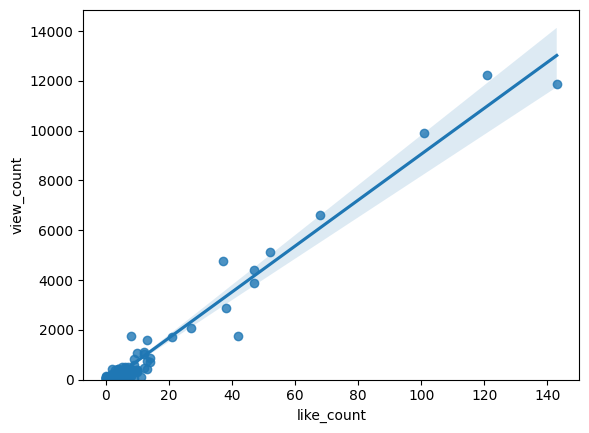

In [ ]:

import seaborn as sns
import matplotlib.pyplot as plt

# Create a scatter plot with a regression line for view_count and like_count
sns.regplot(x="like_count", y="view_count", data=df_from_db)

# Set y-axis limit to ensure non-negative values
plt.ylim(0,)

# Display the plot
plt.show()

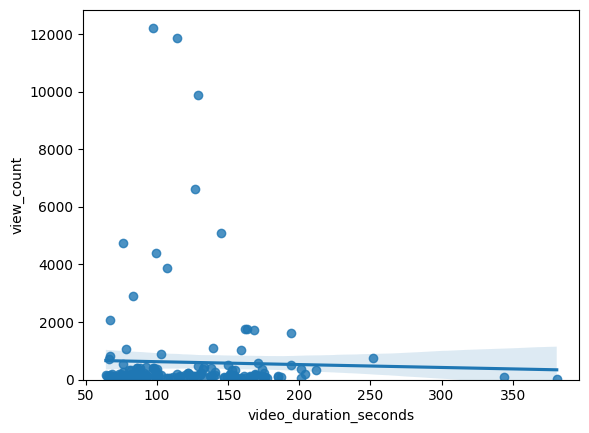

In [ ]:

# Create a scatter plot with a regression line for view_count and like_count
sns.regplot(x="video_duration_seconds", y="view_count", data=df_from_db)

# Set y-axis limit to ensure non-negative values
plt.ylim(0,)

# Display the plot
plt.show()

In [ ]:

from scipy.stats import pearsonr

# Calculate Pearson correlation coefficient and p-value
pearson_coef, p_value = pearsonr(df_from_db['view_count'], df_from_db['like_count'])

# Print the results
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.9808171099795072  with a P-value of P = 6.098908155635593e-122


In [ ]:

from scipy.stats import pearsonr

# Calculate Pearson correlation coefficient and p-value
pearson_coef, p_value = pearsonr(df_from_db['view_count'], df_from_db['video_duration_seconds'])

# Print the results
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is -0.028020369499389457  with a P-value of P = 0.7160089969512515


In [ ]:

import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

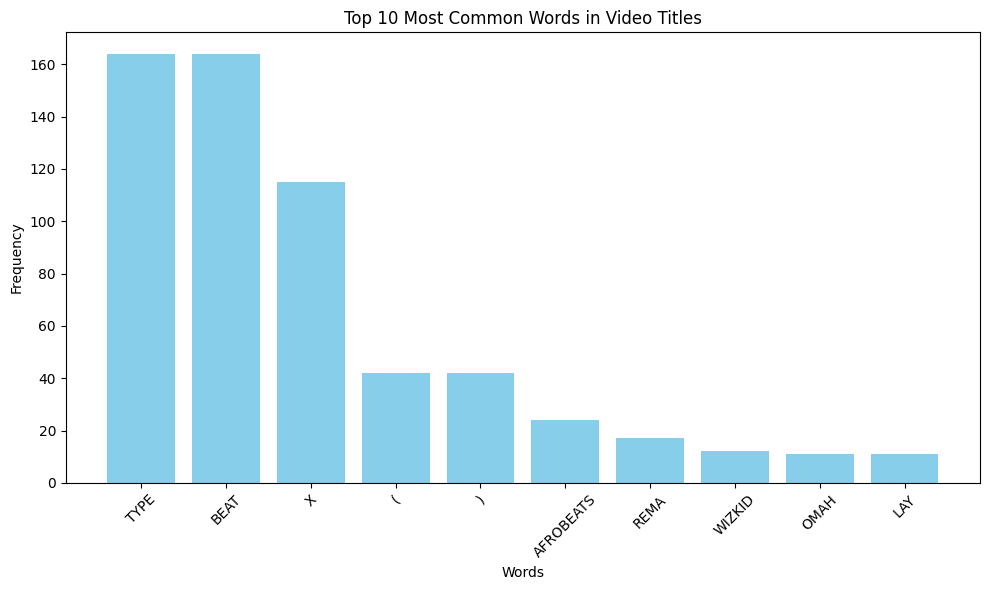

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from nltk.tokenize import word_tokenize

# Tokenize video titles and count word frequencies
tokenized_titles = df_from_db['video_title'].apply(word_tokenize)
word_counts = Counter(word for title in tokenized_titles for word in title)

# Select the most common words and their frequencies
top_words = word_counts.most_common(10)  # Change 10 to adjust the number of words to display

# Extract words and frequencies
words = [word[0] for word in top_words]
frequencies = [word[1] for word in top_words]

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(words, frequencies, color='skyblue')
plt.title('Top 10 Most Common Words in Video Titles')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

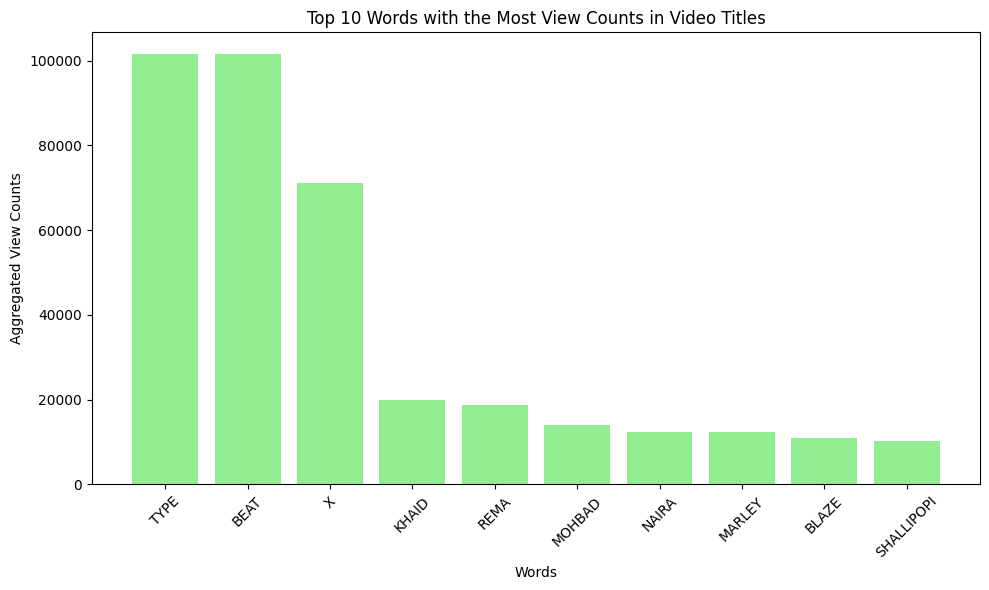

In [ ]:


# Tokenize video titles and aggregate view counts by word
word_view_counts = Counter()
for idx, row in df_from_db.iterrows():
    title_words = word_tokenize(row['video_title'])
    for word in title_words:
        word_view_counts[word] += row['view_count']

# Select the most common words and their aggregated view counts
top_words = word_view_counts.most_common(10)  # Change 10 to adjust the number of words to display

# Extract words and view counts
words = [word[0] for word in top_words]
view_counts = [word[1] for word in top_words]

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(words, view_counts, color='lightgreen')
plt.title('Top 10 Words with the Most View Counts in Video Titles')
plt.xlabel('Words')
plt.ylabel('Aggregated View Counts')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

"AFROBEATS" is one of the most common words used but it doesn't get views.

"REMA" is common and also get views.

#CLASSIFICATION
1 = success,  
0 = failure

In [ ]:

# Define a function to classify view count
def classify_view_count(view_count):
    if view_count >= 600:
        return 1
    else:
        return 0

# Create the new column "view_count_class" using the classification function
df_from_db['view_count_class'] = df_from_db['view_count'].apply(lambda x: classify_view_count(x))

# Verify the DataFrame with the new column
df_from_db.head(10)

,video_id,video_title,upload_date,video_duration_seconds,publishing_time,view_count,like_count,comment_count,title_length,view_count_class
0,p_PH5kD6CyM,SHALLIPOPI X COSTA TITCH TYPE BEAT,2023-12-15,76,05:48:04,4745,37,0,34,1
1,s9v_hMQSR8Y,DOUBLE (AFROBEATS TYPE BEAT),2022-12-16,87,09:08:05,174,5,2,28,0
2,a0MlTHduXkU,FOLD (AFROBEATS TYPE BEAT),2021-12-10,76,05:22:05,279,4,0,26,0
3,hnZNffTECms,ASA X PPRIME TYPE BEAT,2022-06-21,82,11:24:48,184,4,0,22,0
4,o6TgwAE2CwU,KHAID X OMAH LAY TYPE BEAT,2023-12-09,127,08:37:10,6626,68,3,26,1
5,e1pPfuu-GF8,REMA X SELENA GOMEZ TYPE BEAT,2023-10-06,88,04:20:22,152,5,3,29,0
6,7EH2ZfeUYpE,T.I BLAZE TYPE BEAT,2022-11-25,129,05:02:18,9896,101,6,19,1
7,yLaeUvT2Nxs,NAIRA MARLEY X MOHBAD TYPE BEAT,2021-06-18,114,12:07:38,11867,143,10,31,1
8,_deCvU0tCIA,KHAID X REMA TYPE BEAT,2022-05-07,97,11:32:02,12220,121,5,22,1
9,l2zCKhyslmg,WEIRD (AFROBEATS TYPE BEAT),2022-10-13,66,20:48:42,76,4,0,27,0


In [ ]:
df_from_db['view_count_class'].mean()

0.12280701754385964

Success rate is low

#QUERY

In [ ]:

# Convert 'upload_date' column to datetime format
df_from_db['upload_date'] = pd.to_datetime(df_from_db['upload_date'])

# Filter rows with 'class 1' and upload dates between 2022 and 2023
class_1_views_2022_to_2023 = df_from_db[(df_from_db['view_count_class'] == 1) &
                                         (df_from_db['upload_date'].dt.year >= 2022) &
                                         (df_from_db['upload_date'].dt.year <= 2023)]

# List the results
print(class_1_views_2022_to_2023[['view_count', 'upload_date']])

     view_count upload_date
0          4745  2023-12-15
4          6626  2023-12-09
6          9896  2022-11-25
8         12220  2022-05-07
13         1750  2022-04-11
36         1069  2023-03-31
49         5106  2023-07-22
115        2888  2023-02-10


In [ ]:

# Convert 'upload_date' column to datetime format
df_from_db['upload_date'] = pd.to_datetime(df_from_db['upload_date'])

# Filter rows with upload dates between 2022 and 2023
videos_2022_to_2023 = df_from_db[(df_from_db['upload_date'].dt.year >= 2022) &
                                 (df_from_db['upload_date'].dt.year <= 2023)]

# Count the number of videos
num_videos_2022_to_2023 = len(videos_2022_to_2023)

# Print the number of videos
print("Number of videos uploaded between 2022 and 2023:", num_videos_2022_to_2023)

Number of videos uploaded between 2022 and 2023: 100



8 out of 100 video between 2022 and 2023 is in class 1

This further proves that success rate is low, even in recent times. Insight gained from this analysis should help improve the success rate in the future. The successful videos do well exceptionally, they are very far away from the mean, this means there's potential for exponential growth if solutions are applied properly.

##predictive analysis

Random Forest Classifier

In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Step 1: Data Preparation
X = df_from_db.drop(columns=['view_count_class', 'view_count', 'video_id', 'video_title', 'upload_date', 'publishing_time'])  # Features
y = df_from_db['view_count_class']  # Target variable

# Step 2: Split the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Data Preprocessing (Scaling)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 4: Model Selection
model = RandomForestClassifier()  # Random Forest Classifier

# Step 5: Model Training
model.fit(X_train_scaled, y_train)

# Step 6: Model Evaluation
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9428571428571428


In [ ]:

from sklearn.model_selection import cross_val_score

# Step 4: Model Selection
model = RandomForestClassifier()  # Random Forest Classifier

# Step 5: Cross-validation for model evaluation
cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5)  # Assuming 5-fold cross-validation
Rf_best_score = cv_scores.mean()

# Print the best score
print("Best score:", Rf_best_score)

Best score: 0.9637566137566138


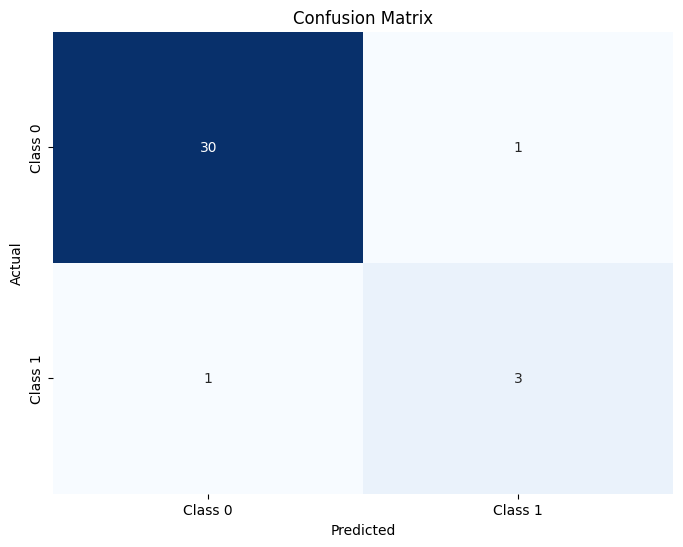

In [ ]:

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.xticks(ticks=[0.5, 1.5], labels=['Class 0', 'Class 1'])
plt.yticks(ticks=[0.5, 1.5], labels=['Class 0', 'Class 1'])
plt.show()

Logistic Regression

In [ ]:

import numpy as np

Y = df_from_db['view_count_class'].to_numpy()

In [ ]:

from sklearn import preprocessing
transform = preprocessing.StandardScaler()

In [ ]:
X = transform.fit(X).transform(X)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
parameters ={'C':[0.01,0.1,1],
             'penalty':['l2'],
             'solver':['lbfgs']}

In [ ]:

# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV
# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression
# Support Vector Machine classification algorithm
from sklearn.svm import SVC
# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier
# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
parameters ={"C":[0.01,0.1,1],'penalty':['l2'], 'solver':['lbfgs']}# l1 lasso l2 ridge
lr=LogisticRegression()

gridsearch_cv_lr = GridSearchCV(lr, parameters, scoring='accuracy', cv=10)
logreg_cv = gridsearch_cv_lr.fit(X_train, Y_train)

In [ ]:
print("tuned hyperparameters :(best parameters) ", logreg_cv.best_params_)
lr_best_score = logreg_cv.best_score_
print("accuracy :", lr_best_score)

tuned hyperparameters :(best parameters)  {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.9417582417582417


In [ ]:
lr_score = logreg_cv.score(X_test, Y_test)
print(f"Logistic Regression - Accuracy using method score: {lr_score}")

Logistic Regression - Accuracy using method score: 0.9714285714285714


In [ ]:

def plot_confusion_matrix(y_true, y_pred):
    """This function plots the confusion matrix."""
    from sklearn.metrics import confusion_matrix
    import matplotlib.pyplot as plt
    import seaborn as sns

    cm = confusion_matrix(y_true, y_pred)
    ax = plt.subplot()
    sns.heatmap(cm, annot=True, ax=ax, cmap='Blues')  # annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix')
    ax.xaxis.set_ticklabels(['Class 0', 'Class 1'])
    ax.yaxis.set_ticklabels(['Class 0', 'Class 1'])

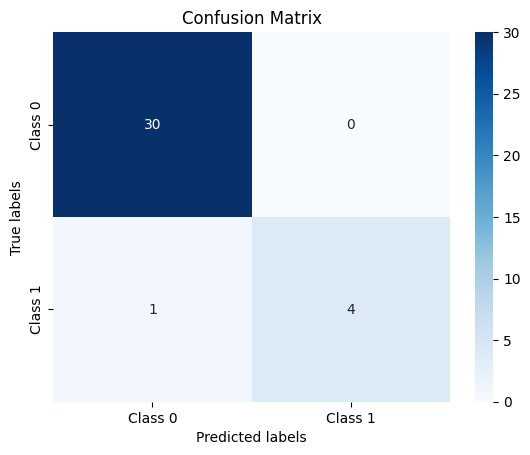

In [ ]:
yhat=logreg_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

Class 0 = Failure

Class 1 = Success

Support Vector Machine

In [ ]:
parameters = {'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma':np.logspace(-3, 3, 5)}
svm = SVC()
gridsearch_cv_svm = GridSearchCV(svm, parameters, scoring='accuracy', cv=10)
svm_cv = gridsearch_cv_svm.fit(X_train, Y_train)
print("tuned hyperparameters :(best parameters) ",svm_cv.best_params_)
svm_best_score = svm_cv.best_score_
print("accuracy :",svm_best_score)

tuned hyperparameters :(best parameters)  {'C': 31.622776601683793, 'gamma': 0.001, 'kernel': 'linear'}
accuracy : 0.9565934065934065


In [ ]:
svm_score = svm_cv.score(X_test, Y_test)
print(f"SVM - Accuracy using method score: {svm_score}")

SVM - Accuracy using method score: 1.0


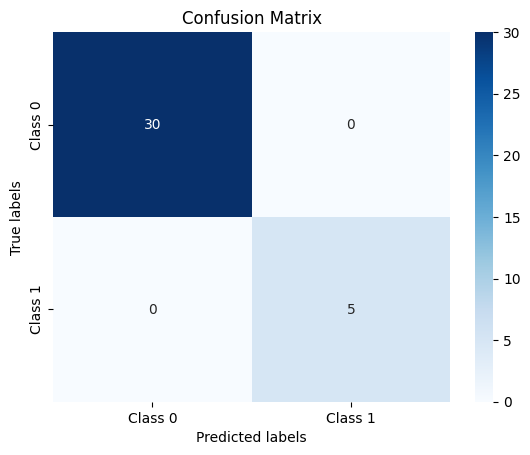

In [ ]:
yhat=svm_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

Decision Tree Classifier

In [ ]:
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

tree = DecisionTreeClassifier()
gridsearch_cv_tree = GridSearchCV(tree, parameters, scoring='accuracy', cv=10)
tree_cv = gridsearch_cv_tree.fit(X_train, Y_train)

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_feat

In [ ]:
print("tuned hyperparameters :(best parameters) ",tree_cv.best_params_)
tree_best_score = tree_cv.best_score_
print("accuracy :",tree_best_score)

tuned hyperparameters :(best parameters)  {'criterion': 'gini', 'max_depth': 18, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 10, 'splitter': 'best'}
accuracy : 0.9714285714285715


In [ ]:
tree_score = tree_cv.score(X_test, Y_test)
print(f"Decision Tree - Accuracy using method score: {tree_score}")

Decision Tree - Accuracy using method score: 0.8571428571428571


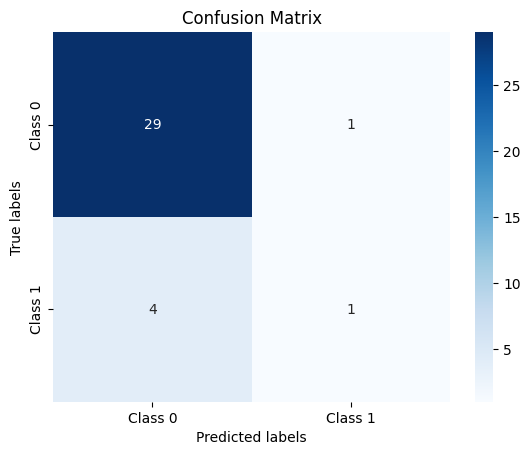

In [ ]:
yhat = tree_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

k-Nearest Neighbors

In [ ]:
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

KNN = KNeighborsClassifier()
gridsearch_cv_knn = GridSearchCV(KNN, parameters, scoring='accuracy', cv=10)
knn_cv = gridsearch_cv_tree.fit(X_train, Y_train)
print("tuned hyperparameters :(best parameters) ",knn_cv.best_params_)
knn_best_score = knn_cv.best_score_
print("accuracy :",knn_best_score)

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_feat

tuned hyperparameters :(best parameters)  {'criterion': 'gini', 'max_depth': 8, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 2, 'splitter': 'best'}
accuracy : 0.9714285714285715


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


In [ ]:
knn_score = knn_cv.score(X_test, Y_test)
print(f"KNN - Accuracy using method score: {knn_score}")

KNN - Accuracy using method score: 0.8857142857142857


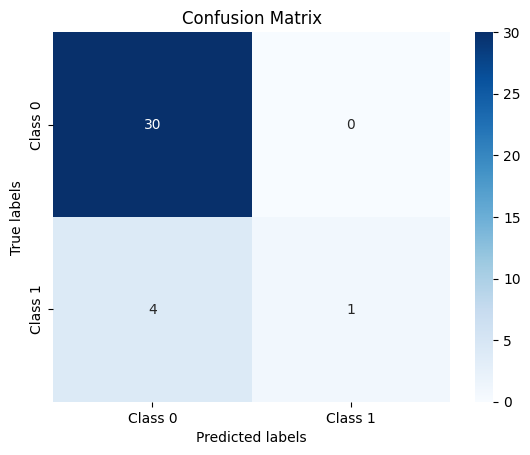

In [ ]:
yhat = knn_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

# Best performing method

In [ ]:
algorithms = ['Random Forest Classifier', 'Logistic Regression', 'Support Vector Machine', 'Decision Tree', 'K Nearest Neighbours']

scores = [accuracy, lr_score, svm_score, tree_score, knn_score]

best_scores = [Rf_best_score, lr_best_score, svm_best_score, tree_best_score, knn_best_score]

column_names = ['Algorithm', 'Accuracy Score', 'Best Score']

In [ ]:
df = pd.DataFrame(list(zip(algorithms, scores, best_scores)),columns = column_names)
df

,Algorithm,Accuracy Score,Best Score
0,Random Forest Classifier,0.942857,0.963757
1,Logistic Regression,0.971429,0.941758
2,Support Vector Machine,1.000000,0.956593
3,Decision Tree,0.857143,0.971429
4,K Nearest Neighbours,0.885714,0.971429


<ipython-input-51-596c0f5a3eba>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=algorithms, y=best_scores, palette="Blues")


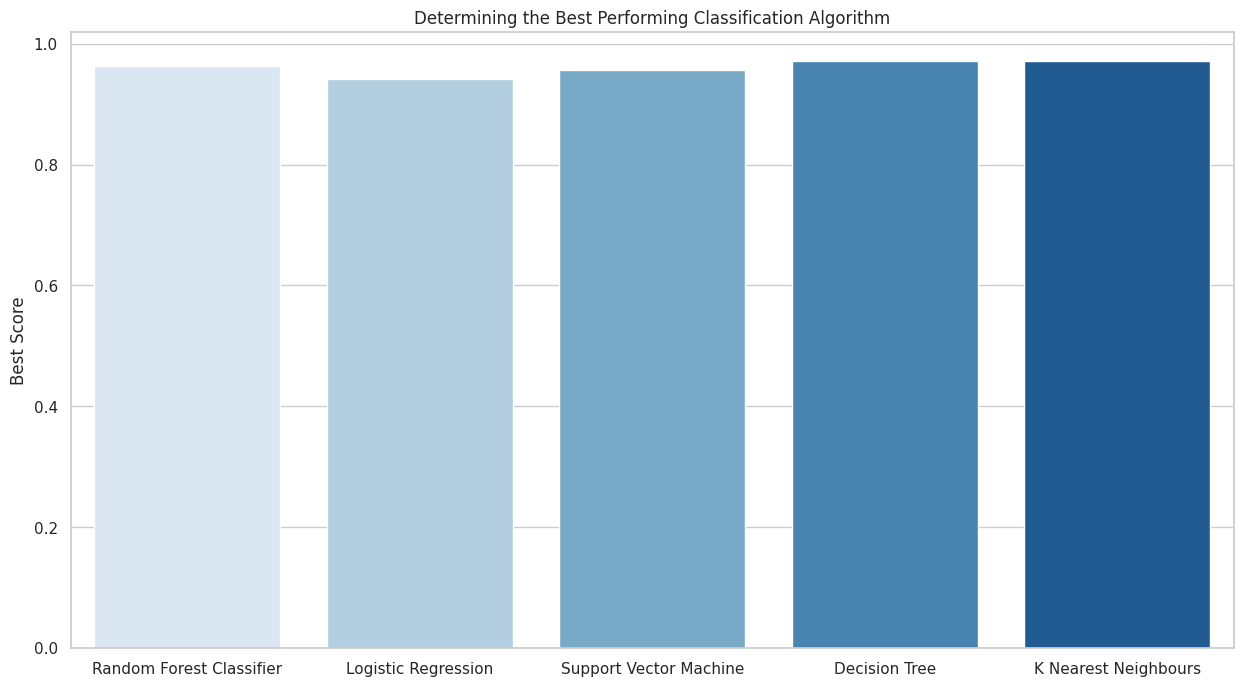

In [ ]:
sns.set(style="whitegrid")

plt.figure(figsize=(15,8))
sns.barplot(x=algorithms, y=best_scores, palette="Blues")
plt.title("Determining the Best Performing Classification Algorithm")
plt.ylabel("Best Score")
plt.show()

<ipython-input-52-65304a877787>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=algorithms, y=scores, palette="Blues")


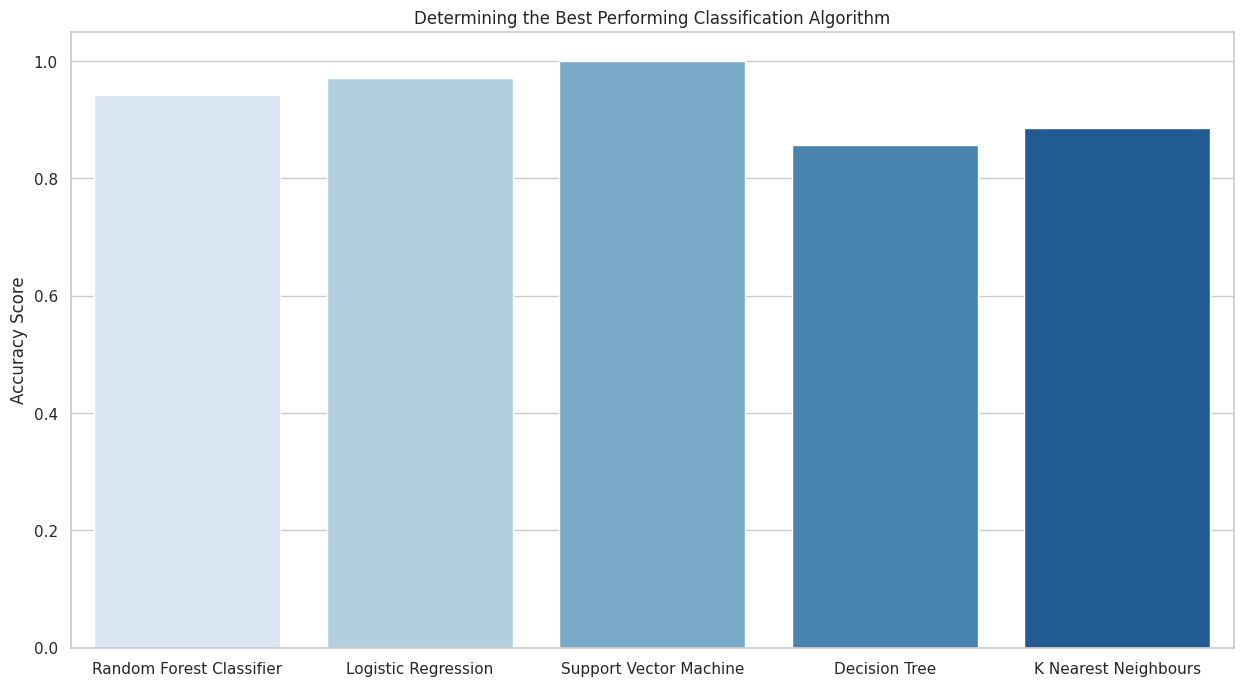

In [ ]:
plt.figure(figsize=(15,8))
sns.barplot(x=algorithms, y=scores, palette="Blues")
plt.title("Determining the Best Performing Classification Algorithm")
plt.ylabel("Accuracy Score")
plt.show()

SVM is the best performing method.